# **Project Name** - Transport Demand Prediction

**Project Summary**

In summary, the project aims to create a model that predicts the number of seats sold for each ride on specific routes, dates, and times for Mobiticket. The routes originate from 14 towns towards Lake Victoria, ending in Nairobi. The journey takes around 8 to 9 hours to reach the outskirts of Nairobi and an additional 2 to 3 hours to reach the main bus terminal. Passengers are influenced by traffic conditions during their travel into the city and onward to their final destinations in Nairobi. Understanding these patterns can help improve service planning and optimize operations for Mobiticket.

To enhance the performance of the model, additional features have been generated. These new features aim to provide more relevant information and contribute to improved predictions. The dataset has been subjected to testing using multiple regression models. These models have been employed to analyze the data and derive insights, allowing for a comprehensive evaluation of the predictive capabilities. The most significant features identified by the model are highlighted and displayed. These key features play a crucial role in determining the number of seats sold for each ride. By showcasing these important factors, stakeholders can gain a better understanding of the influential elements driving seat sales.

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### Nairobi Transport Data.csv (zipped) is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

**Github Link**:

https://github.com/ganeshhegde48/Regression-python-project


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eda/train_revised.csv')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


# Dataset Information

In [ ]:
# Rows and Columns count of the dataset
df.shape

(51645, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
# looking for duplicate values
df.duplicated().value_counts()

False    51645
Name: count, dtype: int64

In [ ]:
# checking null values
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

Above information tells us that there are no null values and no duplicate values

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe()

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


**Description of Variables**

ride_id: unique ID of a vehicle on a specific route on a
specific day and time.

seat_number: seat assigned to ticket

payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)

payment_receipt: unique id number for ticket purchased from Mobiticket

travel_date: date of ride departure. (MM/DD/YYYY)

travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)

travel_from: town from which ride originated

travel_to: destination of ride. All rides are to Nairobi.

car_type: vehicle type (shuttle or bus)

max_capacity: number of seats on the vehicle



In [ ]:
# checking number of unique ride ids
len(df['ride_id'].unique())

6249

In [ ]:
# grouping ride ids to target number of tickets
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
# dropping less usefull columns
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [ ]:
# dropping duplicate values
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

In [ ]:
# merging new dataframe with original dataframe on ride ids
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
# createing date time column with combination of travel date and travel time
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [ ]:
dfnew = df.copy()

In [ ]:
# adding functions to above features
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

#Applying function on our dataframe
dfnew = create_date_cols(dfnew)

In [ ]:
dfnew.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend'],
      dtype='object')

In [ ]:
dfnew.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [ ]:
#converting travel time column into integer format
dfnew['travel_time'] = dfnew['travel_time'].str.split(':').apply(lambda x: round(int(x[0]) + int(x[1])/60 , 2))

In [ ]:
# creating functions to define the time intervals
def get_period(hour):
  if hour<=7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

dfnew['time_period_of_day'] = dfnew['travel_hour'].apply(get_period)

In [ ]:
dfnew.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,em
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,em
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,em
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,em
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,em


# Data Visualization

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'types of transport used')

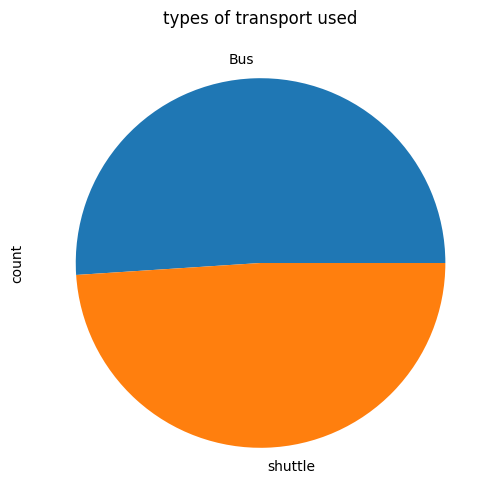

In [ ]:
# Types of transport used
plt.figure(figsize =(8,6))
dfnew['car_type'].value_counts().plot(kind='pie')
plt.title("types of transport used")



Bus is the most prefered mode of transport

Text(0.5, 1.0, 'distribution of tickets')

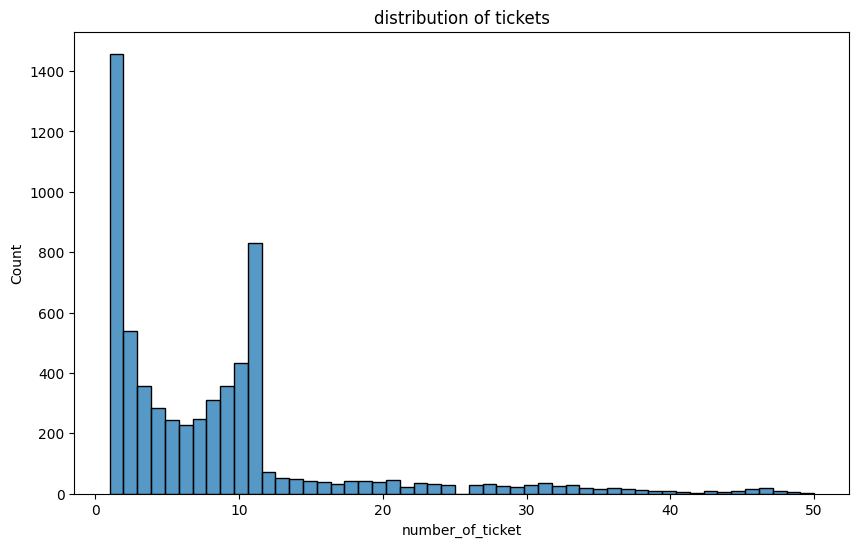

In [ ]:
# Distribution of tickets
plt.figure(figsize=(10,6))
sns.histplot(dfnew['number_of_ticket'])
plt.title("distribution of tickets")

From data, number of tickets are bought between 1 and 12

Text(0, 0.5, 'Number of Tickets')

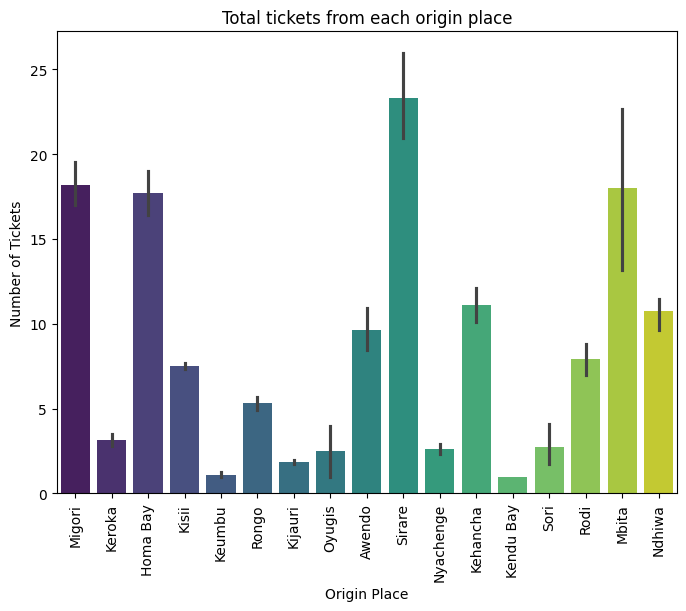

In [ ]:
# total numnber of ticket from each origin
plt.figure(figsize=(8,6))
sns.barplot(data=dfnew,x='travel_from',y='number_of_ticket', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')
plt.xlabel('Origin Place')
plt.ylabel('Number of Tickets')

Maximum tickets are sold from
1. Sirare
2. Mbita
3. Migori

And least tickets are sold from
 1. Keumbu
 2. Kendu bay

Text(0, 0.5, 'Count')

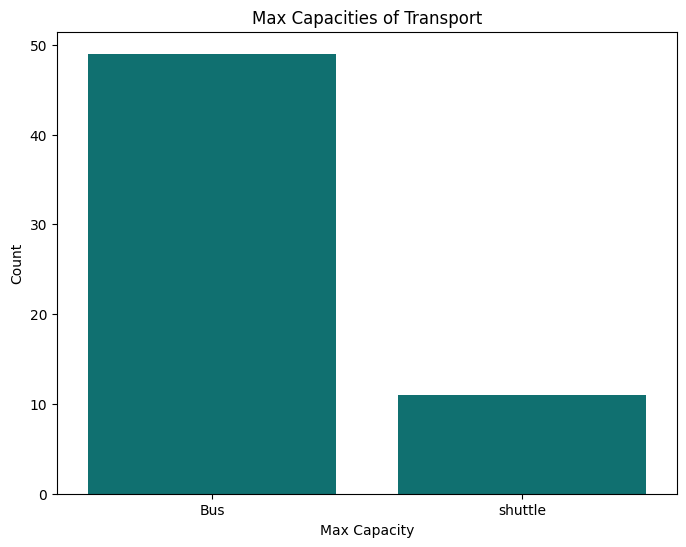

In [ ]:
# capacity of transport
plt.figure(figsize=(8,6))
sns.barplot(data=dfnew, x='car_type', y='max_capacity', color='teal')
plt.title("Max Capacities of Transport")
plt.xlabel('Max Capacity')
plt.ylabel('Count')

From the above chart, we can say that bus has the capacity of 49 and shuttle has 11

Text(0, 0.5, 'Count')

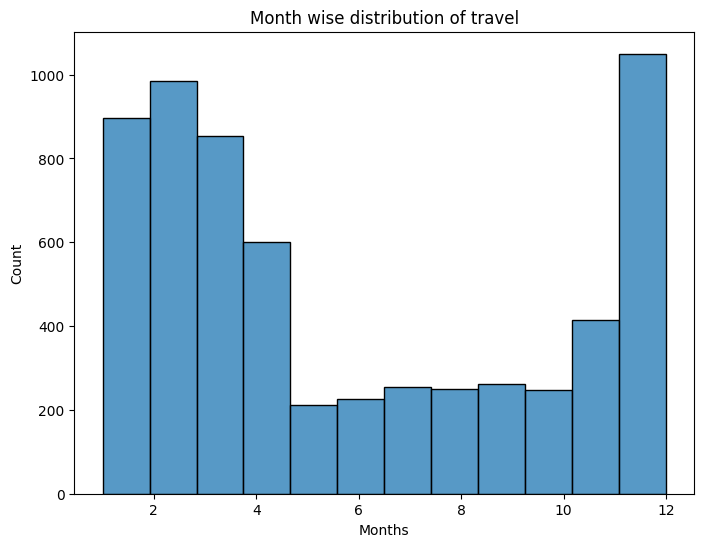

In [ ]:
# Distribution of travellers according to months
plt.figure(figsize=(8,6))
sns.histplot(dfnew['travel_month'], bins= 12)
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count')

Most of the travellers travel in the month of December, January and February

Text(0, 0.5, 'Count')

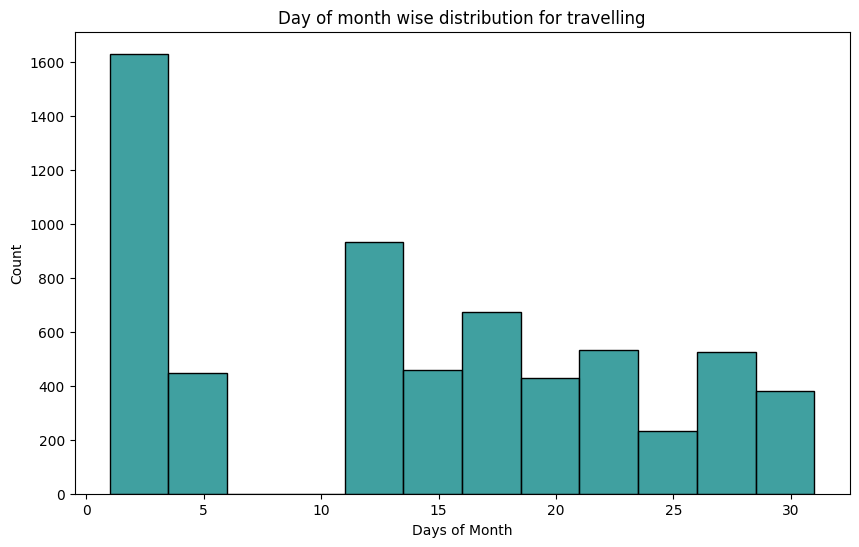

In [ ]:
# Distribution of travellers according to days of the month
plt.figure(figsize=(10,6))
sns.histplot(dfnew['travel_day_of_month'],bins=12, color='teal')
plt.title('Day of month wise distribution for travelling')
plt.xlabel('Days of Month')
plt.ylabel('Count')

Beginning of the month is when most of the passengers travel. Few days between 5th and 11th are observed to have no travel, this may be due to holidays

Text(0.5, 1.0, 'Number of tickets for every day of month')

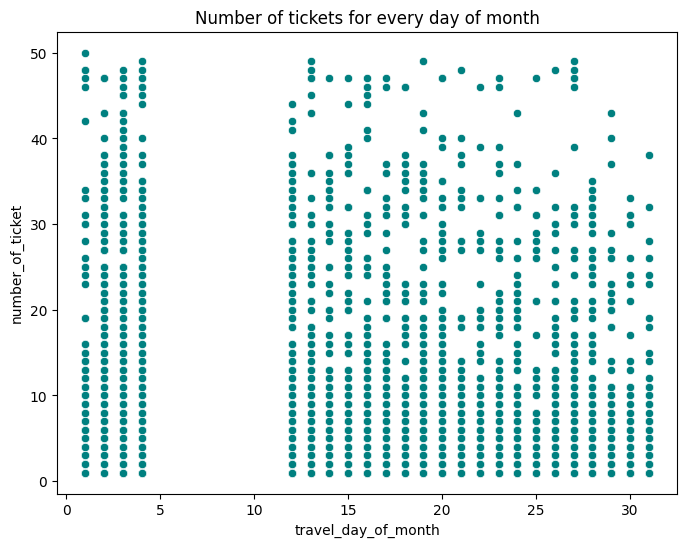

In [ ]:
# number of ticket sold for everyday of the month
plt.figure(figsize=(8,6))
sns.scatterplot(data=dfnew, x='travel_day_of_month',y='number_of_ticket',color='teal')
plt.title('Number of tickets for every day of month')

We can observe the same pattern as of day of monthwise travel

Text(0.5, 1.0, 'Number of tickets for each period of day')

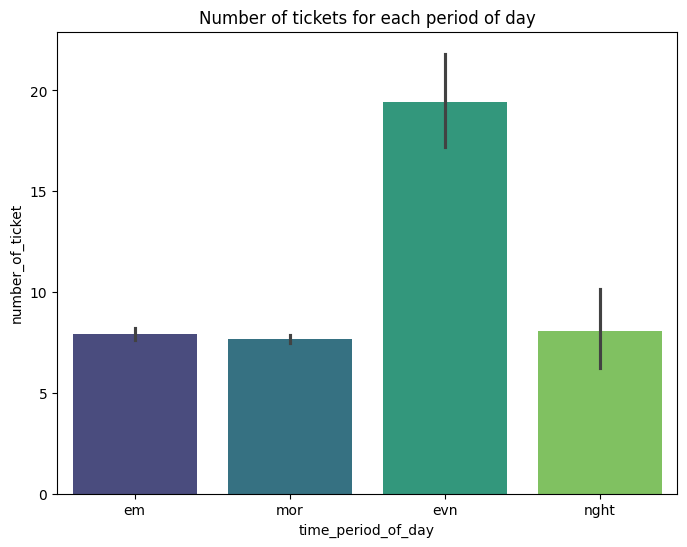

In [ ]:
# Number of tickets sold for each period of the day
plt.figure(figsize=(8,6))
sns.barplot(data=dfnew, x='time_period_of_day',y='number_of_ticket', palette='viridis')
plt.title('Number of tickets for each period of day')

Most tickets gets sold in the evening

Text(0.5, 1.0, 'Number of tickets for each hour of day')

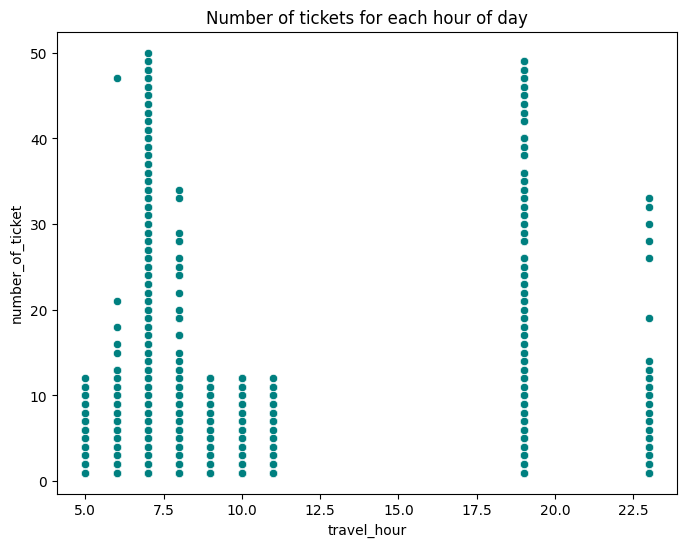

In [ ]:
# number of tickets sold each hour of the day
plt.figure(figsize=(8,6))
sns.scatterplot(data=dfnew, x='travel_hour',y='number_of_ticket',color='teal')
plt.title('Number of tickets for each hour of day')

Most tickets get sold at the time of people going to work and them returning back. That is 7 A.M and 7 P.M

# Feature Engineering

In [ ]:
dfnew.travel_month.value_counts()

travel_month
12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: count, dtype: int64

In [ ]:
dfnew.travel_day_of_year.value_counts()

travel_day_of_year
285    94
348    89
193    81
224    81
163    80
       ..
359     5
290     1
323     1
330     1
318     1
Name: count, Length: 149, dtype: int64

In [ ]:
dfnew.travel_day_of_month.value_counts()

travel_day_of_month
2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: count, dtype: int64

In [ ]:
dfnew.time_period_of_day.value_counts()

time_period_of_day
em      4189
mor     1774
evn      225
nght      61
Name: count, dtype: int64

In [ ]:
# Manipuliate features to minimize feature correaltion and create new features
period_dict = dict(dfnew.time_period_of_day.value_counts())
dfnew['travel_hour_wise_weights'] = np.log1p(dfnew.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(dfnew.travel_day_of_year.value_counts())
dfnew['travel_day_of_year_wise_weights'] = np.log1p(dfnew.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
dfnew['travel_day_of_month_wise_weights'] = dfnew.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1, 2: 1, 1: 1, 3: 1, 4: 1, 11: 2, 9: 3, 7: 3, 8: 3, 10: 3, 6: 3, 5: 3}
dfnew['travel_month_wise_weights'] = dfnew.travel_month.replace(travel_month_wise_weights_dict)

In [ ]:
dfnew.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7.25,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,em,8.340456,0.693147,3,3
1,5437,2017-11-19,7.20,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,em,8.340456,0.693147,3,2
2,5710,2017-11-26,7.08,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,em,8.340456,0.693147,4,2
3,5777,2017-11-27,7.17,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,...,331,0,7,4,0,em,8.340456,3.871201,4,2
4,5778,2017-11-27,7.20,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,...,331,0,7,4,0,em,8.340456,3.871201,4,2


In [ ]:
# creating columns for time difference between next and previous buses for each of the origin places
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]

  #Handling missing values
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [ ]:
new_transport_data = find_difference_bw_bus(dfnew)

In [ ]:
new_transport_data.groupby(["travel_from"]).date_time.shift(-1)

502    2018-01-04 07:08:00
5530   2018-01-04 07:12:00
5533   2018-01-04 07:13:00
5539   2018-01-04 08:00:00
5528   2018-01-13 07:08:00
               ...        
5833   2018-11-04 07:05:00
5875   2018-11-04 23:10:00
5834   2018-12-04 07:05:00
5921   2018-12-04 23:10:00
5884                   NaT
Name: date_time, Length: 6249, dtype: datetime64[ns]

In [ ]:
new_transport_data[['travel_from','date_time','Time_gap_btw_0_1_next_bus','Time_gap_btw_0_1_previous_bus']].head()

,travel_from,date_time,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus
502,Awendo,2017-05-12 07:08:00,-5688.000000,5688.000000
5530,Awendo,2018-01-04 07:08:00,-0.066667,5688.000000
5533,Awendo,2018-01-04 07:12:00,-0.016667,0.066667
5539,Awendo,2018-01-04 07:13:00,-0.783333,0.016667
5528,Awendo,2018-01-04 08:00:00,-215.133333,0.783333


In [ ]:
# Making a dictionary containing distances of places originating from nairobi taken from google maps
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

new_transport_data['distance_to_destination'] = new_transport_data['travel_from'].map(distance_from_nairobi)

In [ ]:
new_transport_data.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination'],
      dtype='object')

# Handling missing values

In [ ]:
new_transport_data.isnull().sum()

ride_id                             0
travel_date                         0
travel_time                         0
travel_from                         0
car_type                            0
max_capacity                        0
number_of_ticket                    0
date_time                           0
travel_month                        0
travel_year                         0
travel_day_of_month                 0
travel_day_of_year                  0
travel_day_of_week                  0
travel_hour                         0
quarter                             0
is_weekend                          0
time_period_of_day                  0
travel_hour_wise_weights            0
travel_day_of_year_wise_weights     0
travel_day_of_month_wise_weights    0
travel_month_wise_weights           0
Time_gap_btw_0_1_next_bus           1
Time_gap_btw_0_1_previous_bus       1
Time_gap_btw_0_2_next_bus           3
Time_gap_btw_0_2_previous_bus       3
Time_gap_btw_0_3_next_bus           3
Time_gap_btw

In [ ]:
new_transport_data.dropna(inplace=True)

# Categorical Encoding and Data Splitting

In [ ]:
# Encoding categorical columns
from sklearn import preprocessing
final_df = pd.get_dummies(dfnew, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [ ]:
# Label encoding car_type column
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,2017-05-12,7.13,1,49,2,2017-05-12 07:08:00,5,2017,12,...,False,False,False,True,False,False,False,False,False,True
5530,12926,2018-01-04,7.13,1,49,20,2018-01-04 07:08:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5533,12929,2018-01-04,7.20,1,49,2,2018-01-04 07:12:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5539,12935,2018-01-04,7.22,1,49,9,2018-01-04 07:13:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False
5528,12924,2018-01-04,8.00,1,49,15,2018-01-04 08:00:00,1,2018,4,...,False,False,False,False,True,False,False,True,False,False


# Data Splitting

In [ ]:
# Separating independent and target variable
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time','travel_month','travel_day_of_month','travel_day_of_year','travel_hour']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6246, 36)

In [ ]:
#target variable
y = final_df['number_of_ticket'].values
y.shape

(6246,)

In [ ]:
# Spliting data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(4996, 36)

In [ ]:
y_train.shape

(4996,)

# Model Implimentation

In [ ]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [ ]:
# Creating function for evaluation  metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 Score is {}'.format(r2_score(actual, predicted)))

# 1. Linear Regression

In [ ]:
# Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)

# Predict on the model
y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.94968094907819
RMSE is 6.6294555544990414
MAE is 4.543163273431888
MAPE is 152.56567898843204
R2 Score is 0.3900656697217776
Adjusted R2 :  0.3856378342932605


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 53.5548810165302
RMSE is 7.3181200466055625
MAE is 5.029087586610278
MAPE is 174.1411133389802
R2 Score is 0.36463359934629436
Adjusted R2 :  0.34577688836234266


# 2. Lasso

In [ ]:
#implemantation
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)

# Predict on the model
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 46.57492031742069
RMSE is 6.824582061739802
MAE is 4.721348710382209
MAPE is 159.7780563971785
R2 Score is 0.3536325584597131
Adjusted R2 :  0.34894023583510114


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 55.4165706328077
RMSE is 7.444230694491385
MAE is 5.166641927446278
MAPE is 177.55177968618577
R2 Score is 0.3425468164391767
Adjusted R2 :  0.3230346032419882


# Cross- validation & Hyperparameter Testing

In [ ]:
# implemantation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X, y)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_train_pred = lasso_regressor.predict(X_train)

y_test_pred = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -57.4133256567956


In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.99542296472535
RMSE is 6.6329045647231615
MAE is 4.555353587634985
MAPE is 153.22064085439092
R2 Score is 0.3894308613437225
Adjusted R2 :  0.38499841750592734


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 53.14129680941
RMSE is 7.289807734735533
MAE is 5.0195474484790825
MAPE is 173.9786916312086
R2 Score is 0.36954029513307174
Adjusted R2 :  0.35082920743710355


This model has not given good results due to decreased accuracy.

#  3. Ridge


In [ ]:
# Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_train_pred = ridge.predict(X_train)

y_test_pred = ridge.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 43.95240895863913
RMSE is 6.629661300446587
MAE is 4.542729125780703
MAPE is 152.55945272236224
R2 Score is 0.39002781036424383
Adjusted R2 :  0.3855997000946557


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 53.555326576042894
RMSE is 7.318150488753487
MAE is 5.029603844463595
MAPE is 174.10742796016737
R2 Score is 0.36462831330068124
Adjusted R2 :  0.3457714454349141


# Cross- validation & Hyperparameter Testing

In [ ]:
# Implementation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X,y)

# Predict on the model
y_train_pred = ridge_regressor.predict(X_train)

y_test_pred = ridge_regressor.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 44.095545399226495
RMSE is 6.640447680633174
MAE is 4.561345482926131
MAPE is 153.57890833339695
R2 Score is 0.3880413606985633
Adjusted R2 :  0.3835988297417471


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 53.229214883326485
RMSE is 7.2958354479337375
MAE is 5.0244211270525785
MAPE is 173.87894241071086
R2 Score is 0.36849724939911754
Adjusted R2 :  0.3497552056879619


Even this model lacks accuracy and cannot be used and the best model

# 4. XGBoost

In [ ]:
# Implimentation
import xgboost as xgb
xgbr = xgb.XGBRegressor()

# Fit the Algorithm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 4.4339346346606705
RMSE is 2.105691011202895
MAE is 1.4630944114072164
MAPE is 42.926998919292046
R2 Score is 0.9384657887500343
Adjusted R2 :  0.9380190794124664


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 32.33449638380167
RMSE is 5.686342970996533
MAE is 3.5097520247243343
MAPE is 103.07187164395357
R2 Score is 0.6163887923122233
Adjusted R2 :  0.605003793567986


# Cross- validation & Hyperparameter Testing

In [ ]:
# Implementation
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight
                         }
print(xgb_grid_params_dict)


xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
xgbr_grid.fit(X,y)


print(xgbr_grid.best_params_)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 6, 'min_child_weight': 12}


In [ ]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=12, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [ ]:
# Taking best params and creating new regressor
xgbr_optimal_model =xgbr_grid.best_estimator_

# Predict on the model
y_train_pred = xgbr_optimal_model.predict(X_train)

y_test_pred = xgbr_optimal_model.predict(X_test)

In [ ]:
# Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 9.052252563457332
RMSE is 3.008696156719274
MAE is 2.0504193129903414
MAPE is 60.91040445638456
R2 Score is 0.8743727033832432
Adjusted R2 :  0.8734607084894737


In [ ]:
# Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 9.91478394482214
RMSE is 3.148774991138957
MAE is 2.075699195742607
MAPE is 60.22235848870873
R2 Score is 0.8823726153674697
Adjusted R2 :  0.878881613020585


**The following evalutation metrics were chosen for evaluating business impact :**

1.Mean Squared Error (MSE)

2.Root Mean Squared Error (RMSE)

3.Mean Absolute Error (MAE)

4.Mean Absolute Percentage Error (MAPE)

5.R2 Score

6.Adjusted R2 Score

**Final Prediction Model :**

XGBoost

Performance on test data:

R2 Score : 0.882

Adjusted R2 : 0.878

In [ ]:
# collecting importatnt features from final prediction
importances = xgbr_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

#Creating a dataframe from the dictionary of important features
importance_df = pd.DataFrame(importance_dict)

#Sorting features inside df by feature importance in descending order
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['travel_from_Sirare', 'distance_to_destination', 'travel_hour_wise_weights', 'travel_from_Sori', 'Time_gap_btw_0_1_next_bus', 'travel_from_Kisii', 'Time_gap_btw_0_1_previous_bus', 'travel_day_of_month_wise_weights_2', 'travel_from_Kehancha', 'travel_day_of_month_wise_weights_4', 'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_next_previous_bus', 'travel_from_Migori', 'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_0_3_next_bus', 'travel_month_wise_weights_2', 'quarter', 'travel_day_of_year_wise_weights', 'travel_from_Homa Bay', 'Time_gap_btw_0_2_previous_bus']


Text(0.5, 1.0, 'Feature Importance')

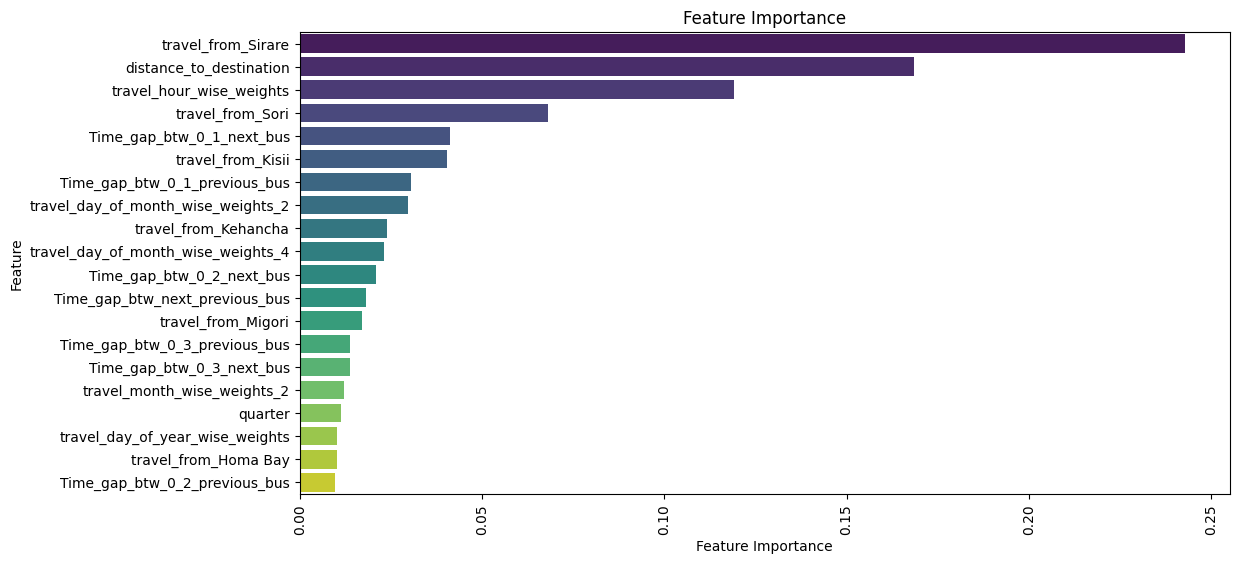

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')

# Conclusion

In this project, we have used different regression models to predict transport demand from various places to nairobi.

Using the data, we have created the target variable and several other features that contribute to our model performance.

We have used regression models including:

Linear Regression, Lasso (L1), Ridge (L2),XGBoost.

We have also performed hyperparameter tuning to improve the performance of these models.

Out of all these models, the hyperparameter tuned XGBoost gives the best result with an accuracy of around 88%